## Torchvision

Torchvision 是一个和 Pytorch 配合使用的 Python 包，Torchvision 库就是常用的数据集 + 常用的网络模型 + 常用图像处理方法，其中 Torchvision 默认使用的图像加载器是 PIL，因此还需要安装 Pillow 库。Pillow 提供了包括图像存储、图像显示、格式转换以及基本的图像处理操作等。

In [1]:
!pip install torchvision pillow

### Dataset 类

Pytorch 中的 Dataset 类是一个抽象类，它可以表示数据集，通过继承该类来定义数据集的格式、大小和其他属性，可提供 DataLoader 类直接使用。

在继承 Dataset 类时，需要重写如下方法：

- `__init__()`：构造函数，可以自定义数据读取方法以及进行数据预处理；
- `__len__`()：返回数据集大小；
- `__getitem__`()：索引数据集中的某一个数据；

In [6]:
import torch
from torch.utils.data import Dataset


class MyDataset(Dataset):
	def __init__(self, data_tensor, target_tensor):
		self.data_tensor = data_tensor
		self.target_tensor = target_tensor

	def __len__(self):
		return self.data_tensor.size(0)

	def __getitem__(self, idx):
		return self.data_tensor[idx], self.target_tensor[idx]


## 生成随机数据
data_tensor = torch.rand(10, 3)
target_tensor = torch.randint(2, (10,))

# 将数据封装成 Dataset
my_dataset = MyDataset(data_tensor, target_tensor)

print('数据集大小 =>', len(my_dataset))
print('tensor_data[0] =>', my_dataset[0])

数据集大小 => 10
tensor_data[0] => (tensor([0.6154, 0.4736, 0.0786]), tensor(1))


### DataLoader 类

在实际项目中，如果数据量很大，考虑到内存有限、I/O 速度等问题，在训练过程中不可能一次性将所有数据全部加载到内存中，也不能只用一个进程去加载，所以就需要多进程、迭代加载，而 DataLoader 就是基于这些需求设计出来的。

DataLoader 是一个迭代器，最进本的使用方法就是传入一个 Dataset 对象，它会根据 batch_size 的值生成一个 batch 的数据，节省内存的同时，它还可以实现多进程，数据打乱等处理。

In [8]:
from torch.utils.data import DataLoader

tensor_dataloader = DataLoader(
	dataset=my_dataset,  # 传入数据集
	batch_size=2,  # 输出的 batch 大小
	shuffle=True,  # 数据是否打乱
	num_workers=0,  # 进程数，0 表示只有主进程
)

# 以循环形式输出
for data, target in tensor_dataloader:
	print(data, target)

# 输出一个 batch
print('--------------------------------')
print(iter(tensor_dataloader).__next__())

tensor([[0.6449, 0.8829, 0.7074],
        [0.5200, 0.1780, 0.0085]]) tensor([1, 0])
tensor([[0.0011, 0.0626, 0.0499],
        [0.3759, 0.2763, 0.8687]]) tensor([1, 1])
tensor([[0.6154, 0.4736, 0.0786],
        [0.4200, 0.0010, 0.5457]]) tensor([1, 0])
tensor([[0.1788, 0.6719, 0.3409],
        [0.9157, 0.8443, 0.1232]]) tensor([0, 0])
tensor([[0.2055, 0.8512, 0.8304],
        [0.5263, 0.7079, 0.8265]]) tensor([0, 0])
--------------------------------
[tensor([[0.5200, 0.1780, 0.0085],
        [0.2055, 0.8512, 0.8304]]), tensor([0, 0])]


## Torchvision 读取数据

Torchvision 库中 torchvision.datasets 包提供了丰富的图像数据集的接口。常用的图像数据集，例如：MNIST、COCO 等。torchvision.datasets 不包含数据集的文件，其工作方式就是先从网络上把数据集下载到用户指定目录，然后再用它的加载器把数据集加载到内存中。最后，把这个加载后的数据集作为对象返回给用户。

In [9]:
import torchvision

dir(torchvision.datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'Imagenette',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'MovingMNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 

### MNIST 数据集

MNIST 数据集是一个著名的手写数字数据集，它是 NIST 数据集的一个子集，包含了如下四个部分：

- 训练集图片
    - 文件名称：train-images-idx3-ubyte.gz
    - 其他信息：9.9MB，解压后 47MB，包含6万个样本
- 训练集标签
    - 文件名称：train-labels-idx1-ubyte.gz
    - 其他信息：29KB，解压后 60KB，包含6万个样本
- 测试集图片
    - 文件名称：t10k-images-idx3-ubyte.gz
    - 其他信息：1.6MB，解压后 7.8MB，包含1万个样本
- 测试集标签
    - 文件名称：t10k-labels-idx1-ubyte.gz
    - 其他信息：5KB，解压后 10KB，包含1万个样本

MNIST 数据集是 ubyte 格式存储，通过 torchvision.datasets.MNIST 加载数据集

- root: 指定保存 MNIST 数据集的位置，如果 download 是 False，则会从目标位置读取数据集；
- download：表示是否下载数据集，如果为 True，则从网上下载这个数据集，存储到 root 指定的位置，如果指定位置已经存在数据集文件，则不会重复下载；
- train：是否加载数据集，如果为 True，则只加载训练数据。如果为 False，则只加载测试数据集；
- transform：用于对图像进行预处理操作，例如数据增强、归一化、旋转或缩放等；
- target_transform：用于对图像标签进行预处理操作；

In [12]:
# 加载 MNIST 数据集
mnist_dataset = torchvision.datasets.MNIST(
	root=r'/Users/h_vk/Documents/Repository/Python/huggingface/dataset',
	train=True,
	transform=None,
	target_transform=None,
	download=True
)

mnist_dataset_list = list(mnist_dataset)
display(mnist_dataset_list[0][0])
print(mnist_dataset_list[0][1])

5


## torchvision.transforms

torchvision.transforms 提供了常用的图像操作，包括对 Tensor 及 PIL Image 对象的操作。

### 数据类型转换

tensor([[[0.4157, 0.4196, 0.4353,  ..., 0.4196, 0.4196, 0.4196],
         [0.3961, 0.4000, 0.4196,  ..., 0.4157, 0.4157, 0.4157],
         [0.3961, 0.4000, 0.4118,  ..., 0.4157, 0.4157, 0.4157],
         ...,
         [0.5725, 0.5725, 0.5804,  ..., 0.8157, 0.8157, 0.8118],
         [0.5961, 0.5961, 0.6078,  ..., 0.8157, 0.8157, 0.8118],
         [0.6078, 0.6118, 0.6235,  ..., 0.8157, 0.8157, 0.8118]],

        [[0.5059, 0.5098, 0.5176,  ..., 0.4902, 0.4902, 0.4902],
         [0.4863, 0.4902, 0.5020,  ..., 0.4863, 0.4863, 0.4863],
         [0.4863, 0.4902, 0.4941,  ..., 0.4863, 0.4863, 0.4863],
         ...,
         [0.4980, 0.4980, 0.4941,  ..., 0.8549, 0.8549, 0.8510],
         [0.5216, 0.5216, 0.5216,  ..., 0.8549, 0.8549, 0.8510],
         [0.5333, 0.5373, 0.5373,  ..., 0.8549, 0.8549, 0.8510]],

        [[0.6275, 0.6314, 0.6392,  ..., 0.6392, 0.6392, 0.6392],
         [0.6078, 0.6118, 0.6235,  ..., 0.6353, 0.6353, 0.6353],
         [0.6078, 0.6118, 0.6157,  ..., 0.6353, 0.6353, 0.

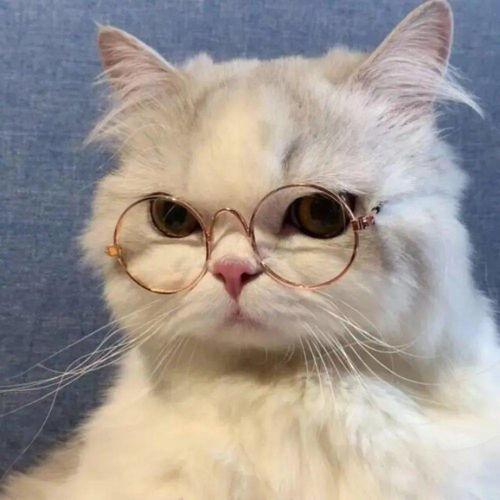

In [15]:
from PIL import Image
from torchvision import transforms

img = Image.open(r'/Users/h_vk/Downloads/Image/cat.jpeg')

# PIL.Image 转 Tensor
img_tensor = transforms.ToTensor()(img)
print(img_tensor)

# Tensor 转 PIL.Image
img_pil = transforms.ToPILImage()(img_tensor)
img_pil

### Resize

torchvision.transforms.Resize 可以将输入的 Tensor 或 PIL Image 调整为给定的尺寸，参数如下：
- size: 指定尺寸，size的格式为 (w, h) 的元组；
- interpolation: 差值算法，默认为 2，表示 PIL.Image.BILINEAR

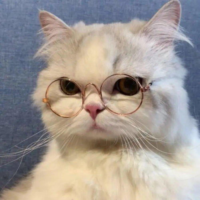

In [16]:
resize_img = transforms.Resize((200, 200), interpolation=2)(img)
resize_img

### 裁剪

- 中心裁剪 CenterCrop(size)
- 随机裁剪 RandomCrop(size, padding=None)
    - padding 表示每个边框可选填充，默认为 None
- FiveCore(size)：分别从图像的四个角和中心进行裁剪

原图：


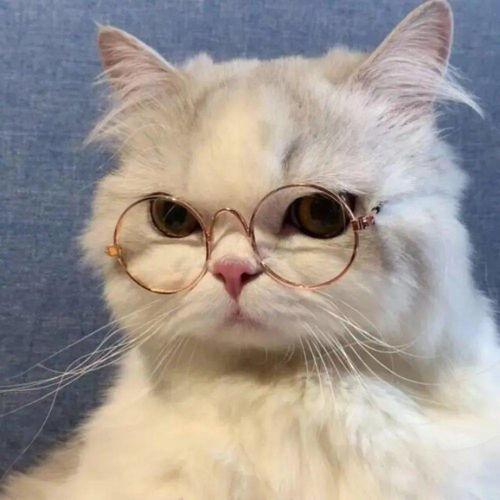

中心裁剪：


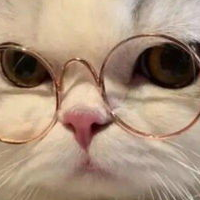

随机裁剪：


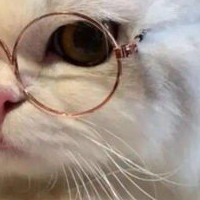

四角和中心裁剪:


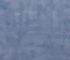

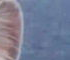

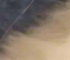

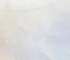

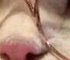

In [19]:
print('原图：')
display(img)

print('中心裁剪：')
center_crop_img = transforms.CenterCrop((200, 200))(img)
display(center_crop_img)

print('随机裁剪：')
random_crop_img = transforms.RandomCrop((200, 200))(img)
display(random_crop_img)

print('四角和中心裁剪:')
five_crop_img = transforms.FiveCrop((60, 70))(img)
for _img in five_crop_img:
	display(_img)

### 翻转

- RandomHorizontalFlip(p)： 以概率 p 随机水平翻转
- RandomVerticalFlip(p)：以概率 p 随机垂直翻转

如果必须执行翻转，将 p 设置为 1, p 默认为 0.5

原图：


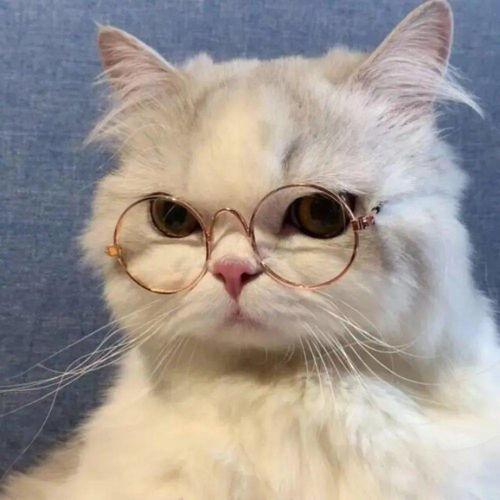

随机水平翻转


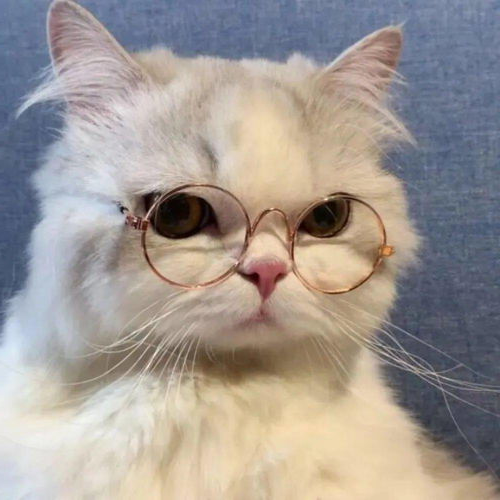

随机垂直翻转


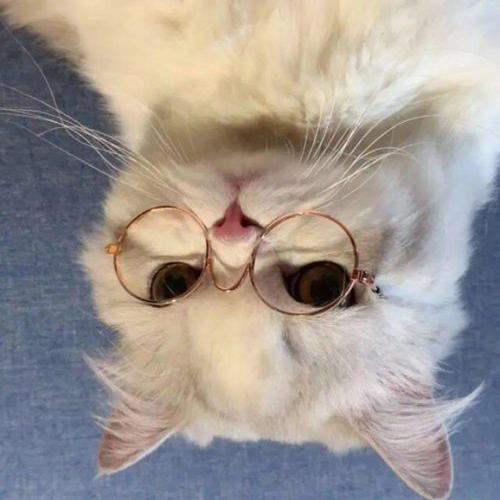

In [25]:
print('原图：')
display(img)

print('随机水平翻转')
random_horizontal_flip_img = transforms.RandomHorizontalFlip(p=1)(img)
display(random_horizontal_flip_img)

print('随机垂直翻转')
random_vertical_flip_img = transforms.RandomVerticalFlip(p=1)(img)
display(random_vertical_flip_img)

### 标准化（只支持 Tensor）

标准化是指每个数据点减去所有通道的平均值，再除以所在通道的标准差，数学公式为 output = (input - mean) / std

对图像进行标准化，就是对图像的每个通道利用均值和标准差进行标准化，这样的目的是为了保证数据集中所有的图像分布都相似，这样在训练的时候更容易收敛，既加快了训练速度，也提高了训练效果。

- Normalize(mean, std, inplace=False) 标准化函数
    - mean：各通道的均值
    - std 各通道的标准差
    - inplace 是否原地操作

原图：


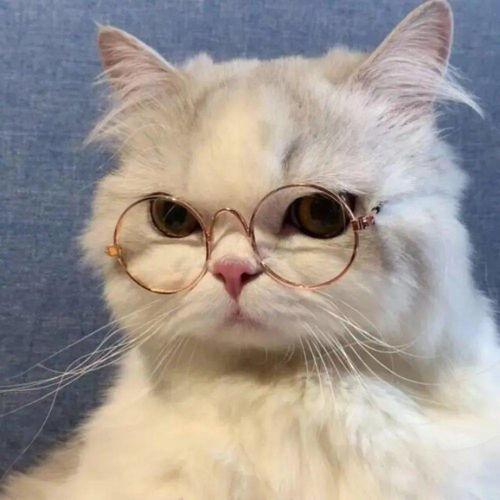

标准化：


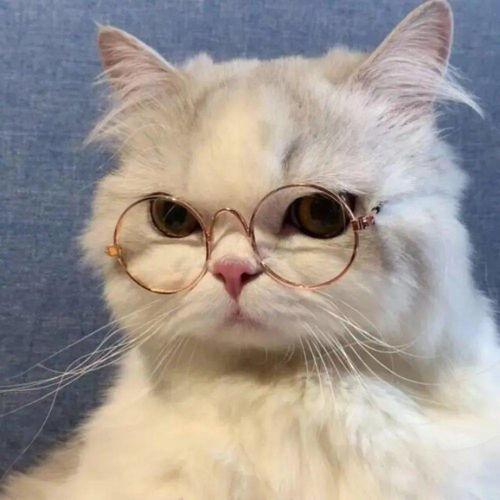

In [33]:
print('原图：')
display(img)

print('标准化：')
normalize_img_tensor = transforms.ToTensor()(img)
normalize_img = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(normalize_img_tensor)
normalize_img_pil = transforms.ToPILImage()(normalize_img_tensor)
display(normalize_img_pil)

### 变换组合

以上的操作都可以用 Compose 类组合起来，进行连续操作。Compose 类是将多个转换组合在一起。 
transforms.Compose(transforms)， 其中 transforms 是一个 Transform 对象列表，表示要组合的变换列表。

原图：


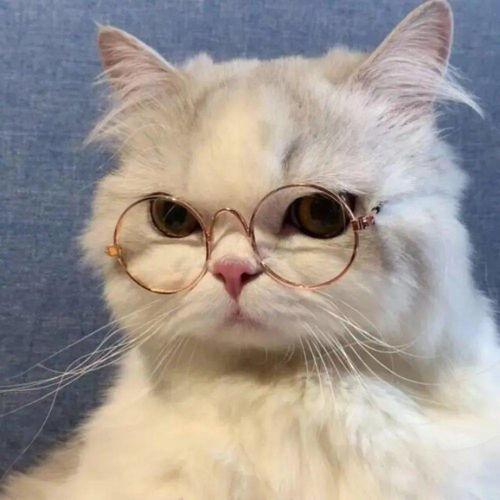

组合操作后的图片：


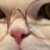

In [35]:
print('原图：')
display(img)

print('组合操作后的图片：')
compose = transforms.Compose([
	transforms.Resize((200, 200)),
	transforms.CenterCrop((50, 50))
])
compose_img = compose(img)
display(compose_img)


### Compose 类结合 Dataset 使用

torchvision.datasets 包，可以再读取数据集的时候做图像变换与数据增强操作。

In [36]:
from torchvision import datasets, transforms

compose_dataset = transforms.Compose([
	transforms.ToTensor(),
	transforms.Normalize((0.5), (0.5))
])

compose_mnist_dataset = datasets.MNIST(
	root=r'/Users/h_vk/Documents/Repository/Python/huggingface/dataset',
	transform=compose_dataset,
	download=True
)

print(compose_mnist_dataset[0][0])

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

## models 模块

torchvision.models 模块中包含了常见网络模型结构的定义，这些网络模型可以解决一下四大类问题：图像分类、图像分割、物体检测和视频分类。

### 实例化一个 GoogLeNet 网络

GoogLeNet 是 Google 推出的基于 Inception 模块的深度神经网络模型

In [38]:
import os
from torchvision import models

os.environ['TORCH_HOME'] = '/Users/h_vk/Documents/Repository/Python/torch'

# 加载 googlenet 预训练模型
googlenet = models.googlenet(pretrained=True)

### 模型微调
模型微调 就是在一个比较通用、宽泛的数据集上进行大量训练得出了一套参数，然后再使用这套训练好的网络和参数，在自己的任务和数据集上进行训练。
使用经过预训练的模型，要比使用随机初始化的模型训练效果更好，更容易收敛，并且训练速度更快，在小数据集上也能取得比较理想的效果。

In [42]:
# 提取分类层的输入参数
fc_in_features = googlenet.fc.in_features
print('fc_in_features ', fc_in_features)

# 查看分类层的输出参数
fc_out_features = googlenet.fc.out_features
print('fc_out_features ', fc_out_features)

# 修改预训练模型的输入分类参数
googlenet.fc = torch.nn.Linear(fc_in_features, 10)

fc_in_features  1024
fc_out_features  10


## 其他常用参数

### make_grid

make_grid 的作用是将若干幅图像拼成在一个网格中

torchvision.utils.make_grid(tensor, nrow=8, padding=2)

- tensor 如果输入类型是 Tensor，其形状应是 (B x C x H x W);如果输入类型是列表，列表中元素应为相同大小的图片
- nrow 表示一行放入的图片数量， 默认为 8
- padding 图像之间的边框宽度，默认为 2

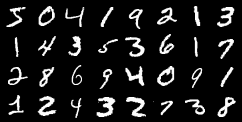

In [44]:
from torchvision import datasets, transforms, utils
from torch.utils.data import  DataLoader

# 加载 MNIST 数据集
make_grid_mnist_dataset = datasets.MNIST(
	root=r'/Users/h_vk/Documents/Repository/Python/huggingface/dataset',
	download=True,
	transform=transforms.ToTensor()
)

# 取 32 张图像的 tensor
make_grid_mnist_tensor_dataloader = DataLoader(
	dataset=make_grid_mnist_dataset,
	batch_size=32
)

make_grid_mnist_img_tensor, make_grid_mnist_label_tensor = iter(make_grid_mnist_tensor_dataloader).__next__()

# 将 32 张图片拼接在一起
grid_tensor = utils.make_grid(tensor=make_grid_mnist_img_tensor)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

### save_image

save_image 可以直接将 Tensor 保存为图片，即使 Tensor 数据在 CUDA 上，也会自动移动到 CPU 上进行保存。

torchvision.utils.save_image(tensor, fp, **kwargs)
- tensor 数据
- fp 保存图片的文件名
- make_grid 中的参数

In [45]:
from torchvision.utils import save_image

# 直接保存图片
save_image(grid_tensor, r'/Users/h_vk/Downloads/grid.png')

# 输入为 List，调用 grid_img 函数保存
save_image(make_grid_mnist_img_tensor, r'/Users/h_vk/Downloads/grid-2.png', nrow=5, padding=2)
vgg16 = models.vgg16(pretrained=True)

/Users/h_vk/Documents/Repository/Python/env/torch2.3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
